# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your Emory code below

In [45]:
# Write your answer here

Emory_ID = 2549526

print(str(Emory_ID))

2549526


<font size = "5" >
This quiz is open book 

- You can use the lecture notes and Google
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"

**By printing the message, you acknowledge that you will abide by Emory's code of conduct.**

In [46]:
# Write your answer here:

print ("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", and "pandas"

In [47]:
# Write your answer here

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<font size = "5">

Import the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting

In [48]:
# Write your own code

quiz2_data = "data_quiz/fifa23_players_basic.csv"
df = pd.read_csv(quiz2_data)

print(df.head())

         Known As           Full Name  Overall  Potential  Value(in Euro)  \
0        L. Messi        Lionel Messi       91         91        54000000   
1      K. Benzema       Karim Benzema       91         91        64000000   
2  R. Lewandowski  Robert Lewandowski       91         91        84000000   
3    K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4       K. Mbappé       Kylian Mbappé       91         95       190500000   

  Positions Played Best Position Nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   
2               ST            ST      Poland   
3           CM,CAM            CM     Belgium   
4            ST,LW            ST      France   

                                         Image Link  Age  ...  Preferred Foot  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35  ...            Left   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34  ...           Right   
2  ht

<font size = "5">

(a) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "overall"
- If "overall < 85", status = "Regular Player"
- If "age_player >= 85", status = "Top Player"
- The function returns "status"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "top_players" <br>
to assign each player to the correct status

HINT: Use the ".apply()" function

In [49]:

def player_status(overall):
    if overall < 85:
        return "Regular Player"
    elif overall >= 85:
        return "Top Player"


df['top_players'] = df['Overall'].apply(player_status)

print(df[['Overall', 'top_players']].head())


   Overall top_players
0       91  Top Player
1       91  Top Player
2       91  Top Player
3       91  Top Player
4       91  Top Player


<font size = "5">

(b) Use queries + global variables

<font size = "3">

- Compute the mean of the column "Wage(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 9) <br>
Reference the column as ``` `Wage(in Euro)`    ``` inside .query()

In [50]:

mean_wage = df['Wage(in Euro)'].mean()

above_mean_players = df.query('`Wage(in Euro)` > @mean_wage')

print(f"Mean Wage: {mean_wage}")
print("\nSubset of Players:")
print(above_mean_players.head())


Mean Wage: 8824.537461567506

Subset of Players:
         Known As           Full Name  Overall  Potential  Value(in Euro)  \
0        L. Messi        Lionel Messi       91         91        54000000   
1      K. Benzema       Karim Benzema       91         91        64000000   
2  R. Lewandowski  Robert Lewandowski       91         91        84000000   
3    K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4       K. Mbappé       Kylian Mbappé       91         95       190500000   

  Positions Played Best Position Nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   
2               ST            ST      Poland   
3           CM,CAM            CM     Belgium   
4            ST,LW            ST      France   

                                         Image Link  Age  ...  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35  ...   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34  ...   
2  h

<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players
- Print their age

In [57]:


sorted_df = df.sort_values(by='Age')

youngest_players_subset = sorted_df.iloc[:5]

print("Ages of the 5 youngest players:")
print(youngest_players_subset['Age'])


Ages of the 5 youngest players:
17956    16
18014    16
16084    16
11481    16
17591    16
Name: Age, dtype: int64


<font size = "5">

(d) Create a function with four inputs $f(y,x,b0,b1)$

<font size = "3">

$\qquad e2 = (y - b_0 - b_1 * x)^2$

- The function should return the mean of e2
- This is the mean-square error (mse)
- Call the function "fn_mse"
- Let $y$ be the column "Potential"
- Let $x$ be the column "Age" 
- Does <br>
$\qquad (b_0 = 80, b_1 = 0.4)$ or <br>
$\qquad (b_0 = 80, b_1 =-0.3)$ or <br>
$\qquad (b_0 = 80, b_1 = -0.5)$ <br>
produce the lowest value of mse?
- Print your results

In [52]:


def fn_mse(y, x, b0, b1):
    e2 = (y - b0 - b1 * x) ** 2
    return e2.mean()

y_column = df['Potential']
x_column = df['Age']

params_set = [
    {'b0': 80, 'b1': 0.4},
    {'b0': 80, 'b1': -0.3},
    {'b0': 80, 'b1': -0.5}
]

for params in params_set:
    b0, b1 = params['b0'], params['b1']
    mse = fn_mse(y_column, x_column, b0, b1)
    print(f"MSE for (b0={b0}, b1={b1}): {mse}")


MSE for (b0=80, b1=0.4): 412.1016840174767
MSE for (b0=80, b1=-0.3): 37.72189870003776
MSE for (b0=80, b1=-0.5): 49.43713253142025


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Create ``` list_status = [0,1]```
- Create ``` list_prob = [0.5, 0.5]```
- Create a new variable $n$ with the number of rows of the dataset
- Define a random seed that equals 42

- Use 
```python
    np.random.choice(list_status,
                     size = n,
                     p = list_prob)
```
$\qquad$ to create a new column called "status" <br>
$\qquad$ which randomly assigns each row to "0" or "1" <br>
$\qquad$ with equal probability
- Use .query() to subset all observations with status == 0.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with status == 1.<br>
store it in a new dataset called "data1"



In [53]:


list_status = [0, 1]
list_prob = [0.5, 0.5]
n = len(df)
np.random.seed(42)

df['status'] = np.random.choice(list_status, size=n, p=list_prob)

data0 = df.query('status == 0')
data1 = df.query('status == 1')

print(len(data0))
print(len(data1))


9304
9235


<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1"
- Use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

- Provide a short interpretation of the graph using the information from the Note

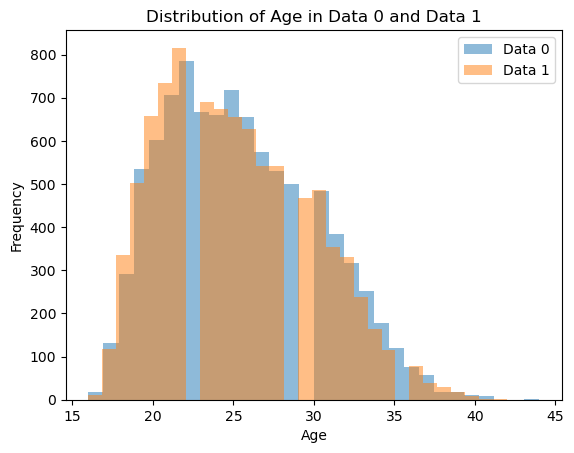

In [54]:

plt.hist(data0['Age'], bins=30, alpha=0.5, label='Data 0')
plt.hist(data1['Age'], bins=30, alpha=0.5, label='Data 1')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Data 0 and Data 1')

plt.legend()

plt.show()

# Interpretation:
#   Due to the similarities in comparing the distribution of the "Age" variable in data0 and data1, the histogram displays that the datasets were successfully randomly assigned 